<a href="https://colab.research.google.com/github/jokandre/colab-samples/blob/master/HumanAction_UCF14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np
# import pylab as plt

Using TensorFlow backend.


In [2]:
!wget https://www.crcv.ucf.edu/data/UCF11_updated_mpg.rar
!unrar x UCF11_updated_mpg.rar

--2019-09-21 01:14:59--  https://www.crcv.ucf.edu/data/UCF11_updated_mpg.rar
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1045106394 (997M) [application/rar]
Saving to: ‘UCF11_updated_mpg.rar’

UCF11_updated_mpg.r 100%[===================>] 996.69M  15.8MB/s    in 66s     

2019-09-21 01:16:06 (15.2 MB/s) - ‘UCF11_updated_mpg.rar’ saved [1045106394/1045106394]


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from UCF11_updated_mpg.rar

Creating    UCF11_updated_mpg                                         OK
Creating    UCF11_updated_mpg/basketball                              OK
Creating    UCF11_updated_mpg/basketball/v_shooting_01                OK
Extracting  UCF11_updated_mpg/basketball/v_shooting_01/v_shooting_01_01.mpg       0%  OK 
Extracting  UCF11_updated_mpg/basketball/v_shootin

In [4]:
!wget https://www.crcv.ucf.edu/data/UCF101/UCF101TrainTestSplits-RecognitionTask.zip
!unzip UCF101TrainTestSplits-RecognitionTask

--2019-09-21 01:28:31--  https://www.crcv.ucf.edu/data/UCF101/UCF101TrainTestSplits-RecognitionTask.zip
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113943 (111K) [application/zip]
Saving to: ‘UCF101TrainTestSplits-RecognitionTask.zip.1’

UCF101TrainTestSpli 100%[===================>] 111.27K   295KB/s    in 0.4s    

2019-09-21 01:28:33 (295 KB/s) - ‘UCF101TrainTestSplits-RecognitionTask.zip.1’ saved [113943/113943]

Archive:  UCF101TrainTestSplits-RecognitionTask.zip
replace ucfTrainTestlist/classInd.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ucfTrainTestlist/classInd.txt  
replace ucfTrainTestlist/testlist01.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ucfTrainTestlist/testlist01.txt  
replace ucfTrainTestlist/testlist02.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ucfTrainTestlist/tes

In [0]:
'''
Create annotation files as in UCF101
'''
import glob
import os
from shutil import copy2, copy

!mkdir data && mkdir data/UCF11

dataset_path = 'UCF11_updated_mpg'
dest_path = 'data/UCF11'

for vid_path in glob.glob(os.path.join(dataset_path, "*","*","*.mpg")):
#   print(vid_path.split('/')[1], vid_path.split('/')[-1])
  dest_dir = os.path.join(dest_path, vid_path.split('/')[1])
  if not os.path.exists(os.path.join(dest_dir)):
    os.mkdir(dest_dir)

  copy(vid_path, dest_dir)
  

# categ = glob.glob(os.path.join(dataset_path, "*"))
# for folder in categ:
#   d = folder.split('/')[-1]

#   _dest = os.path.join(dest_path, d)
#   if not os.path.exists(os.path.join(_dest)):
#     print(_dest)
  
#   vid_paths = glob.glob(os.path.join(folder, "*","*.mpg"))
#   for src_vid_path in vid_paths:
#     vid_name = src_vid_path.split('/')[-1]
#     dest=_dest+'/'+vid_name
#     copy2(src_vid_path, dest)


In [0]:
# !rm -r /content/UCF11_updated_mpg-frames
# !rm -r /content/data/ucf11-frames
!rm -r /content/data/ucfTrainTestSplit

In [0]:
"""
Helper script for extracting frames from the UCF-101 dataset
data/extract_frames.py
"""
# !rm -r /content/UCF11_updated_mpg-frames

# import av
import cv2
import glob
import os
import time
import tqdm
import datetime
import argparse


def extract_frames(video_path, sequence_path):
  frames = []
  vidcap = cv2.VideoCapture(video_path)
  success,image = vidcap.read()
  count = 0
  while success:
    cv2.imwrite(os.path.join(sequence_path, f"{count}.jpg"), image)
    success,image = vidcap.read()
    count += 1


def run():
# if __name__ == "__main__":
  # parser = argparse.ArgumentParser()
  # parser.add_argument("--dataset_path", type=str, default="data/UCF-101", help="Path to UCF-101 dataset")
  # opt = parser.parse_args()
  prev_time = time.time()
  dataset_path = "data/UCF11"
#     print(opt)


  time_left = 0
  video_paths = glob.glob(os.path.join(dataset_path, "*", "*.mpg"))
  print('Found {} videos'.format(len(video_paths)))
  for i, video_path in enumerate(video_paths):
    sequence_type, sequence_name = video_path.split(".mpg")[0].split("/")[-2:]
#     print(sequence_type)
    sequence_path = os.path.join(f"{dataset_path}-frames", sequence_type, sequence_name)

    if os.path.exists(sequence_path):
        continue

    os.makedirs(sequence_path, exist_ok=True)

    # Extract frames
    tqdm.tqdm(
            extract_frames(video_path, sequence_path),
            desc=f"[{i}/{len(video_paths)}] {sequence_name} : ETA {time_left}",
        )

    # Determine approximate time left
    videos_left = len(video_paths) - (i + 1)
    time_left = datetime.timedelta(seconds=videos_left * (time.time() - prev_time))
    prev_time = time.time()
#     break;

run()

In [9]:
# Create classIndex file for generator, similar to UCF101
path = 'data/'
if os.path.exists(path):
  !mkdir data/ucfTrainTestlist
  
categ_paths = glob.glob(os.path.join("data/UCF11","*"))
print('Found {} '.format(len(categ_paths)))

f1 = open(path+'ucfTrainTestlist/trainlist01.txt', 'w+')
f2 = open(path+'ucfTrainTestlist/testlist01.txt', 'w+')

with open(path+'ucfTrainTestlist/classInd.txt', 'w+') as f:
  for i, categ_paths in enumerate(categ_paths):
    f.write("{} {}\n".format(i+1, categ_paths.split('/')[-1]) )
    
#     sub_cat = glob.glob(os.path.join(categ_paths,"*.mpg"))
#     for sub, sub_cat in enumerate(sub_cat):
    vids = glob.glob(os.path.join(categ_paths, "*.mpg"))
    for v, vid in enumerate(vids):
      sub_path, name = vid.split('/')[-2:]
      if v <= 1:
        f2.write('{} {}\n'.format(os.path.join(sub_path, name), i+1))
      else:
        f1.write('{} {}\n'.format(os.path.join(sub_path, name), i+1))
f1.close()
f2.close()


Found 11 


In [0]:
# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies


In [0]:
#Variables
dataset_path="data/UCF11-frames"
split_path="data/ucfTrainTestlist"
split_number=1
num_epochs=100
batch_size=16
sequence_length=20
img_dim=224
channels=3
latent_dim=512
checkpoint_model=""
checkpoint_interval=5
image_shape = (channels, img_dim, img_dim)

params={
  'dataset_path':dataset_path,
  'split_path':split_path,
  'split_number':split_number,
  'input_shape':image_shape,
  'sequence_length':sequence_length,
  'training':True,
}

(20, 224, 224, 3) (1, 11)


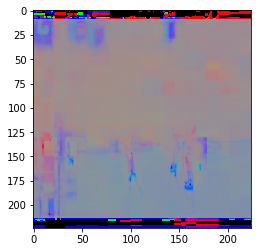

In [26]:
import glob
import random
import os
import numpy as np
import matplotlib.pyplot as plt
# import torch
# from torch.utils.data import Dataset
# import torchvision.transforms as transforms
# from PIL import Image
from skimage.io import imread
from skimage.transform import resize


class DataGenerator(keras.utils.Sequence):
  def __init__(self, dataset_path, split_path, split_number, input_shape, sequence_length, training):
    self.training = training #whether it is training set
    self.label_index = self._extract_label_mapping(split_path)
    self.sequences = self._extract_sequence_paths(dataset_path, split_path, split_number, training)
    self.sequence_length = sequence_length
    self.label_names = sorted(list(set([self._activity_from_path(seq_path) for seq_path in self.sequences])))
    self.num_classes = len(self.label_names)
    self.input_shape = input_shape
#     self.transform = transforms.Compose(
#         [
#             transforms.Resize(input_shape[-2:], Image.BICUBIC),
#             transforms.ToTensor(),
#             transforms.Normalize(mean, std),
#         ]
#     )

  def _extract_label_mapping(self, split_path="data/ucfTrainTestlist"):
    """ Extracts a mapping between activity name and softmax index """
    with open(os.path.join(split_path, "classInd.txt")) as file:
        lines = file.read().splitlines()
    label_mapping = {}
    for line in lines:
        label, action = line.split()
        label_mapping[action] = int(label) - 1
    return label_mapping

  def _extract_sequence_paths(
      self, dataset_path, split_path="data/ucfTrainTestlist", split_number=1, training=True
  ):
    """ Extracts paths to sequences given the specified train / test split """
    assert split_number in [1, 2, 3], "Split number has to be one of {1, 2, 3}"
    fn = f"trainlist0{split_number}.txt" if training else f"testlist0{split_number}.txt"
    split_path = os.path.join(split_path, fn)
    with open(split_path) as file:
        lines = file.read().splitlines()
    sequence_paths = []
    for line in lines:
        seq_name = line.split(".mpg")[0]
        sequence_paths += [os.path.join(dataset_path, seq_name)]
    return sequence_paths

  def _activity_from_path(self, path):
    """ Extracts activity name from filepath """
    return path.split("/")[-2]

  def _frame_number(self, image_path):
    """ Extracts frame number from filepath """
    return int(image_path.split("/")[-1].split(".jpg")[0])

  def _pad_to_length(self, sequence):
    """ Pads the sequence to required sequence length """
    left_pad = sequence[0]
    if self.sequence_length is not None:
        while len(sequence) < self.sequence_length:
            sequence.insert(0, left_pad)
    return sequence

  def __len__(self):
    return len(self.sequences)
  
  def __getitem__(self, index):
#     pdb.set_trace()
    sequence_path = self.sequences[index % len(self)]
    # Sort frame sequence based on frame number
    image_paths = sorted(glob.glob(f"{sequence_path}/*.jpg"), key=lambda path: self._frame_number(path))
    # Pad frames sequences shorter than `self.sequence_length` to length
    image_paths = self._pad_to_length(image_paths)
    if self.training:
      # Randomly choose sample interval and start frame
      sample_interval = np.random.randint(1, len(image_paths) // self.sequence_length + 1)
      start_i = np.random.randint(0, len(image_paths) - sample_interval * self.sequence_length + 1)
      flip = np.random.random() < 0.5 #not sure?
    else:
      # Start at first frame and sample uniformly over sequence
      start_i = 0
      sample_interval = 1 if self.sequence_length is None else len(image_paths) // self.sequence_length
      flip = False
    # Extract frames as tensors
    image_sequence = []
    for i in range(start_i, len(image_paths), sample_interval):
      if self.sequence_length is None or len(image_sequence) < self.sequence_length:
#         image_tensor = self.transform(Image.open(image_paths[i]))
#         tf.keras.preprocessing.image.load_img
        image_tensor = resize(imread(image_paths[i]), (self.input_shape[1:]))#.transpose((2,0,1))
        image_tensor = keras.utils.normalize(image_tensor, axis=-1, order=2)
        if flip:
          image_tensor = np.flip(image_tensor, (-1,))
        image_sequence.append(image_tensor)
    image_sequence = np.stack(image_sequence, axis=0)
    target = self.label_index[self._activity_from_path(sequence_path)] # ???????
    # yield ({'input': image_sequence}, {'output': target})
#     print(self.label_names)
    y = keras.utils.to_categorical(target, num_classes=self.num_classes)
#     print(self.label_index)
#     y[target] = 1
#     return np.array([image_sequence]), np.array([y])
#     image_sequence.reshape(image_sequence.shape[0], image_sequence.shape[2], image_sequence.shape[3], image_sequence.shape[1])
#     image_sequence = image_sequence.transpose((0,2,3,1))
    return image_sequence, np.array([y])
  

# Generators
training_generator = DataGenerator(**params) 

# Define training set
for x,y in training_generator:
  print(x.shape, y.shape)
  plt.imshow(x[0])
#   plt.imshow(x[0][0].transpose((1,2,0)))
  plt.show()
  break;

(1, 20, 224, 224, 3) (1, 11)


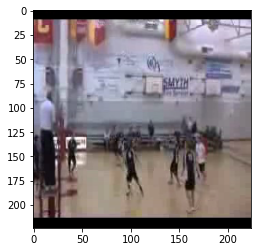

0.996078431372549


In [16]:
import glob
import random
import os
import numpy as np
import matplotlib.pyplot as plt
# import torch
# from torch.utils.data import Dataset
# import torchvision.transforms as transforms
# from PIL import Image
from skimage.io import imread
from skimage.transform import resize


class DataGenerator(keras.utils.Sequence):
  def __init__(self, dataset_path, split_path, split_number, input_shape, sequence_length, training):
    self.training = training #whether it is training set
    self.label_index = self._extract_label_mapping(split_path)
    self.sequences = self._extract_sequence_paths(dataset_path, split_path, split_number, training)
    self.sequence_length = sequence_length
    self.label_names = sorted(list(set([self._activity_from_path(seq_path) for seq_path in self.sequences])))
    self.num_classes = len(self.label_names)
    self.input_shape = input_shape
#     self.transform = transforms.Compose(
#         [
#             transforms.Resize(input_shape[-2:], Image.BICUBIC),
#             transforms.ToTensor(),
#             transforms.Normalize(mean, std),
#         ]
#     )

  def _extract_label_mapping(self, split_path="data/ucfTrainTestlist"):
    """ Extracts a mapping between activity name and softmax index """
    with open(os.path.join(split_path, "classInd.txt")) as file:
        lines = file.read().splitlines()
    label_mapping = {}
    for line in lines:
        label, action = line.split()
        label_mapping[action] = int(label) - 1
    return label_mapping

  def _extract_sequence_paths(
      self, dataset_path, split_path="data/ucfTrainTestlist", split_number=1, training=True
  ):
    """ Extracts paths to sequences given the specified train / test split """
    assert split_number in [1, 2, 3], "Split number has to be one of {1, 2, 3}"
    fn = f"trainlist0{split_number}.txt" if training else f"testlist0{split_number}.txt"
    split_path = os.path.join(split_path, fn)
    with open(split_path) as file:
        lines = file.read().splitlines()
    sequence_paths = []
    for line in lines:
        seq_name = line.split(".mpg")[0]
        sequence_paths += [os.path.join(dataset_path, seq_name)]
    return sequence_paths

  def _activity_from_path(self, path):
    """ Extracts activity name from filepath """
    return path.split("/")[-2]

  def _frame_number(self, image_path):
    """ Extracts frame number from filepath """
    return int(image_path.split("/")[-1].split(".jpg")[0])

  def _pad_to_length(self, sequence):
    """ Pads the sequence to required sequence length """
    left_pad = sequence[0]
    if self.sequence_length is not None:
        while len(sequence) < self.sequence_length:
            sequence.insert(0, left_pad)
    return sequence

  def __len__(self):
    return len(self.sequences)
  
  def __getitem__(self, index):
#     pdb.set_trace()
    sequence_path = self.sequences[index % len(self)]
    # Sort frame sequence based on frame number
    image_paths = sorted(glob.glob(f"{sequence_path}/*.jpg"), key=lambda path: self._frame_number(path))
    # Pad frames sequences shorter than `self.sequence_length` to length
    image_paths = self._pad_to_length(image_paths)
    if self.training:
      # Randomly choose sample interval and start frame
      sample_interval = np.random.randint(1, len(image_paths) // self.sequence_length + 1)
      start_i = np.random.randint(0, len(image_paths) - sample_interval * self.sequence_length + 1)
      flip = np.random.random() < 0.5 #not sure?
    else:
      # Start at first frame and sample uniformly over sequence
      start_i = 0
      sample_interval = 1 if self.sequence_length is None else len(image_paths) // self.sequence_length
      flip = False
    # Extract frames as tensors
    image_sequence = []
    for i in range(start_i, len(image_paths), sample_interval):
      if self.sequence_length is None or len(image_sequence) < self.sequence_length:
#         image_tensor = self.transform(Image.open(image_paths[i]))
#         tf.keras.preprocessing.image.load_img
        image_tensor = resize(imread(image_paths[i]), (self.input_shape[1:]))#.transpose((2,0,1))
        if flip:
          image_tensor = np.flip(image_tensor, (-1,))
        image_sequence.append(image_tensor)
    image_sequence = np.stack(image_sequence, axis=0)
    target = self.label_index[self._activity_from_path(sequence_path)] # ???????
    # yield ({'input': image_sequence}, {'output': target})
#     print(self.label_names)
    y = keras.utils.to_categorical(target, num_classes=self.num_classes)
#     print(self.label_index)
#     y[target] = 1
#     image_sequence/= 255
    return np.array([image_sequence]), np.array([y])
#     return image_sequence, np.array([y])
  

# Generators
training_generator = DataGenerator(
    dataset_path=dataset_path,
    split_path=split_path,
    split_number=split_number,
    input_shape=image_shape,
    sequence_length=sequence_length,
    training=True,
) 

# Define training set
for x,y in training_generator:
  print(x.shape, y.shape)
  plt.imshow(x[0][0])
#   plt.imshow(x[0][0].transpose((1,2,0)))
  plt.show()
  print(x.max())
  break;

In [0]:

# Define training set
training_generator = DataGenerator(
    dataset_path=dataset_path,
    split_path=split_path,
    split_number=split_number,
    input_shape=image_shape,
    sequence_length=sequence_length,
    training=True,
)
 # Define test set
test_dataset = DataGenerator(
    dataset_path=dataset_path,
    split_path=split_path,
    split_number=split_number,
    input_shape=image_shape,
    sequence_length=sequence_length,
    training=False,
)

# Define training set
training_generator = DataGenerator(
    dataset_path=dataset_path,
    split_path=split_path,
    split_number=split_number,
    input_shape=image_shape,
    sequence_length=1,
    training=True,
)
 # Define test set
test_dataset = DataGenerator(
    dataset_path=dataset_path,
    split_path=split_path,
    split_number=split_number,
    input_shape=image_shape,
    sequence_length=1,
    training=False,
)

In [29]:
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

base_model = MobileNetV2(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(11, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(metrics=['accuracy'], loss='categorical_crossentropy', optimizer='rmsprop')

model.fit_generator(training_generator, 
                    validation_data=test_dataset, 
                    epochs=10, 
                    verbose=1, 
#                     steps_per_epoch=80
                   )

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Epoch 1/10
1578/1578 [==============================] - 197s 125ms/step - loss: 2.6153 - acc: 0.1014 - val_loss: 2.7563 - val_acc: 0.0909
Epoch 2/10
1578/1578 [==============================] - 176s 112ms/step - loss: 2.4162 - acc: 0.0995 - val_loss: 2.5743 - val_acc: 0.0909
Epoch 3/10
1578/1578 [==============================] - 176s 111ms/step - loss: 2.4071 - acc: 0.1229 - val_loss: 2.8453 - val_acc: 0.0909
Epoch 4/10
1578/1578 [==============================] - 176s 111ms/step - loss: 2.4121 - acc: 0.1160 - val_loss: 2.4439 - val_acc: 0.0909
Epoch 5/10
1578/1578 [==============================] - 176s 112ms/step - loss: 2.4025 - acc: 0.1236 - val_loss: 2.7352 - val_acc: 0.0909
Epoch 6/10
1578/1578 [==============================] - 174s 110ms/step - loss: 2.3985 - acc: 0.1236 - val_loss: 2.4373 - val_acc: 0.0909
Epoch 7/10
1578/1578 [==============================] - 172s 109ms/step - loss: 2.3957 - acc: 0.1229 - val_loss: 2.6456 - val_acc: 0.0909
Epoch 8/10
1578/1578 [============

In [9]:

from keras.models import Sequential, Model
from keras.layers.convolutional import Conv3D, Conv2D
from keras.layers import Dense, Dropout, Activation, MaxPooling2D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()

# seq.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=(224, 224,3)))
# seq.add(Conv2D(64, (3, 3), activation='relu'))
# seq.add(MaxPooling2D(pool_size=(2, 2)))
# seq.add(Dropout(0.25))

seq.add(ConvLSTM2D(filters=sequence_length, kernel_size=(3, 3),
                   input_shape=(sequence_length, 224, 224, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same'))
seq.add(BatchNormalization())

# seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
#                    padding='same', return_sequences=True))
# seq.add(BatchNormalization())

# seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
#                    padding='same', return_sequences=True))
# seq.add(BatchNormalization())

seq.add(Flatten())
seq.add(Dense(100))
seq.add(Activation("relu"))

seq.add(Dense(11, activation='softmax'))

seq.compile(metrics=['accuracy'], loss='categorical_crossentropy', optimizer='rmsprop')

seq.summary()

# Train the network
# noisy_movies, shifted_movies = generate_movies(n_samples=1200)
# seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
#         epochs=1, validation_split=0.05)

seq.fit_generator(training_generator, epochs=10, verbose=1, steps_per_epoch=80)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_5 (ConvLSTM2D)  (None, 20, 224, 224, 20)  16640     
_________________________________________________________________
batch_normalization_5 (Batch (None, 20, 224, 224, 20)  80        
_________________________________________________________________
conv_lst_m2d_6 (ConvLSTM2D)  (None, 224, 224, 40)      86560     
_________________________________________________________________
batch_normalization_6 (Batch (None, 224, 224, 40)      160       
_________________________________________________________________
flatten_3 (Flatten)          (None, 2007040)           0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               200704100 
_________________________________________________________________
activation_3 (Activation)    (None, 100)              

In [0]:
# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
#     plt.savefig('%i_animate.png' % (i + 1))

In [32]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_data=(x_test, y_test))
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
y_train shape: (60000, 10)


NameError: ignored